Import Apple data

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Definimos qué queremos descargar
ticker = 'AAPL'
start = '2020-01-01'
end = '2023-12-31'

# 2. Descargamos (auto_adjust=True es clave para Quants, ajusta por splits/dividendos)
df = yf.download(ticker, start=start, end=end, auto_adjust=True)

# 3. Mostramos las primeras 5 filas para ver que ha funcionado
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468277,72.528597,71.223274,71.476615,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


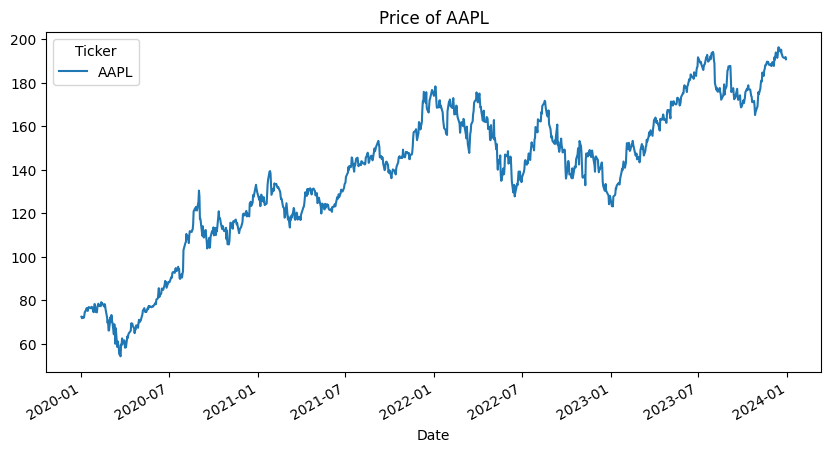

In [45]:
# Vamos a pintar solo el precio de Cierre (Close)
# figsize=(10, 5) hace el gráfico más ancho (10 pulgadas) y bajo (5 pulgadas)
df['Close'].plot(title=f"Price of {ticker}", figsize=(10, 5))
plt.show()

Calculate Simple Return: $$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$
vs Log Returns: $$R_t = \ln \left( \frac{P_t}{P_{t-1}} \right)$$

In [46]:
df['simple_return'] = df['Close'].pct_change()
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# the first row will have NaN log_return due to shift
df.dropna(inplace=True)     # inplace=True to modify df, not create a copy

df.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,-0.009722,-0.009770
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200,0.007968,0.007937
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000,-0.004703,-0.004715
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958
2020-01-09,74.707336,74.900357,73.879750,74.130675,170108400,0.021241,0.021019


The values are really similar. However, working with logarithms is much simpler than with percentages.

Calculate volatility (anual)

In [47]:
df['volatility'] = df['log_return'].std() * np.sqrt(252)  # 252 trading days in a year

df.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return,volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,-0.009722,-0.009770,0.335534
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200,0.007968,0.007937,0.335534
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000,-0.004703,-0.004715,0.335534
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958,0.335534
2020-01-09,74.707336,74.900357,73.879750,74.130675,170108400,0.021241,0.021019,0.335534


Calculate Value at Risk (VaR)

In [48]:
from scipy.stats import norm

# Get "Z-score" for 5% 
cutoff = norm.ppf(0.05)
print(f"The multiplier Z for the 5% is: {cutoff}")

# Calculate Value at Risk (VaR) at 95% confidence level
# VaR = Volatility * Z-score
var_95 = df['volatility'].iloc[-1] * cutoff

print(f"VaR 95% Annual: {var_95:.2%}")

The multiplier Z for the 5% is: -1.6448536269514729
VaR 95% Annual: -55.19%


VaR of -55.19% -> there's a 5% probability chance that, in a year, the loss is >= 55.19%

Or equaly, we are sure at 95% that the loss won't be greater thann 55.19%

Compare Apple with S&P 500

First we get the information of S&P 500 and we join it with the df we had.

In [49]:
ticker = '^GSPC'  # S&P 500 index
start = '2020-01-01'
end = '2023-12-31'

df2 = yf.download(ticker, start=start, end=end, auto_adjust=True)

df2['log_return_sp500'] = np.log(df2['Close'] / df2['Close'].shift(1))
df2.dropna(inplace=True)

df2.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,log_return_sp500
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000,-0.007085
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000,0.003527
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000,-0.002807
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000,0.004890
2020-01-09,3274.699951,3275.580078,3263.669922,3266.030029,3641230000,0.006633


In [50]:
df_sp500_clean = df2[['log_return_sp500']] # dual [] to keep as DataFrame

df_total = df.join(df_sp500_clean, how='inner') # inner only keeps dates that exist in both

df_total.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return,volatility,log_return_sp500
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,-0.009722,-0.009770,0.335534,-0.007085
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200,0.007968,0.007937,0.335534,0.003527
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000,-0.004703,-0.004715,0.335534,-0.002807
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958,0.335534,0.004890
2020-01-09,74.707336,74.900357,73.879750,74.130675,170108400,0.021241,0.021019,0.335534,0.006633


Now we do linear regression to get alpha and beta

In [51]:
from scipy.stats import linregress

# Recuerda: linregress(x, y)
beta, alpha, r_value, p_value, std_err = linregress(x=df_total['log_return_sp500'], y=df_total['log_return'])

print(f"Alpha: {alpha:.5f}")
print(f"Beta: {beta:.2f}")

Alpha: 0.00051
Beta: 1.19


And now the anual alpha, what we would get from Apple in a year if the S&P 500 doesn't move.

In [52]:
df_total['alpha_anualized'] = alpha * 252

df_total.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return,volatility,log_return_sp500,alpha_anualized
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,-0.009722,-0.009770,0.335534,-0.007085,0.12925
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200,0.007968,0.007937,0.335534,0.003527,0.12925
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000,-0.004703,-0.004715,0.335534,-0.002807,0.12925
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958,0.335534,0.004890,0.12925
2020-01-09,74.707336,74.900357,73.879750,74.130675,170108400,0.021241,0.021019,0.335534,0.006633,0.12925


We get an anual alpha of 0.1295, which means that, if the S&P 500 generated a return of 0%, Apple would go up a 12.92%.

<Axes: >

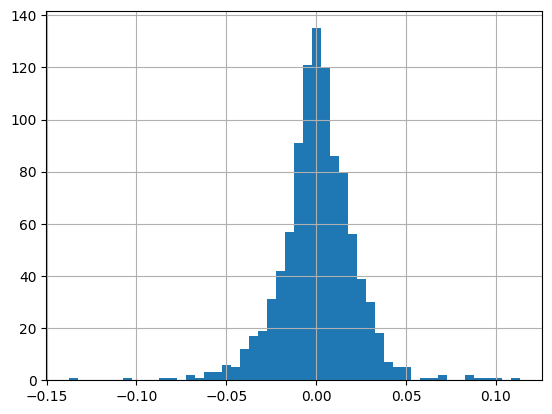

In [53]:
df['log_return'].hist(bins = 50)


<Axes: >

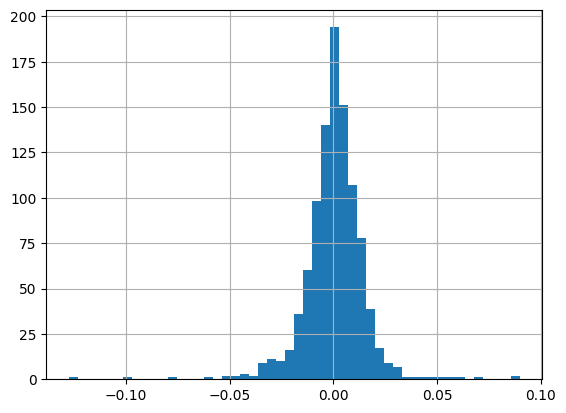

In [54]:
df2['log_return_sp500'].hist(bins = 50)

Calculate the Drawdown (if we bought in the worst moment, how much would we have lost till today?).

First we calculate the High Water Mark (historic max till today).

In [59]:
df_total['Rolling_Max'] = df_total['Close'].cummax()

close_series = df_total[('Close', 'AAPL')]
max_series = df_total[('Rolling_Max', '')]

df_total['Drawdown'] = (close_series - max_series) / max_series

df_total.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return,volatility,log_return_sp500,alpha_anualized,Rolling_Max,Drawdown
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,-0.009722,-0.009770,0.335534,-0.007085,0.12925,71.763725,0.000000
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200,0.007968,0.007937,0.335534,0.003527,0.12925,72.335564,0.000000
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000,-0.004703,-0.004715,0.335534,-0.002807,0.12925,72.335564,-0.004703
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958,0.335534,0.004890,0.12925,73.153481,0.000000
2020-01-09,74.707336,74.900357,73.879750,74.130675,170108400,0.021241,0.021019,0.335534,0.006633,0.12925,74.707336,0.000000


And the minimum in that Drawdown column is the worst moment

In [60]:
max_drawdown = df_total['Drawdown'].min()

print(f"Max Drawdown: {max_drawdown:.2%}")

Max Drawdown: -31.43%


In [58]:
df_total.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return,volatility,log_return_sp500,alpha_anualized
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,-0.009722,-0.009770,0.335534,-0.007085,0.12925
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200,0.007968,0.007937,0.335534,0.003527,0.12925
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000,-0.004703,-0.004715,0.335534,-0.002807,0.12925
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958,0.335534,0.004890,0.12925
2020-01-09,74.707336,74.900357,73.879750,74.130675,170108400,0.021241,0.021019,0.335534,0.006633,0.12925
